In [ ]:
# Importar librerias
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
                                                                                                        # Funcion escalon
def escalon(x):
                                                                                                        # Si x es mayor o igual a 0.5, se devuelve 1
  if x >= 0.5:
    u = 1
  else:
                                                                                                         # De lo contrario se devuelve 0  
    u = 0
  return u

Text(0.5, 1.0, 'escalon')

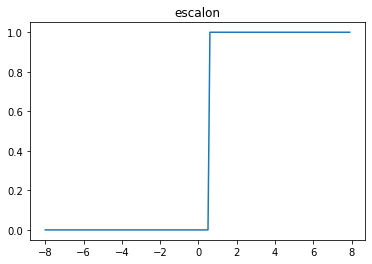

In [ ]:
# Plot de la función escalon
x = np.arange(-8,8,.1)
plt.figure()
plt.plot(x,[escalon(i) for i in x])
plt.title('escalon')

In [ ]:
# bias es de -1
# el resto son compuertas logicas: [0,0], [0,1], [1,0], [1,1]
Mand = np.matrix([[-1.0,0.0,0.0],[-1.0,0.0,1.0],[-1.0,1.0,0.0],[-1.0,1.0,1.0]])
print(Mand)

[[-1.  0.  0.]
 [-1.  0.  1.]
 [-1.  1.  0.]
 [-1.  1.  1.]]


In [ ]:
                                                                                                        # Hiperparametros

alpha = 0.1                                                                                             # factor de aprendizaje
W = np.random.rand(3,1)                                                                                 # pesos (2 entradas, 1 bias)
print(W)
print()

epoca = 0                                                                                               # Epoca actual
epocas = 10                                                                                             # Numero limite de epocas

                                                                                                        # Para graficar el comportamiento del modelo
Evector = np.zeros(epocas)                                                                               # Error promedio en cada epoca
print(Evector)

[[0.82663344]
 [0.33671599]
 [0.97938783]]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
# Funcion de entrenamiento
def Perceptron(traget, Mand, epocas):
  alpha = 0.1 
  W = np.random.rand(Mand.shape[1],1) 
  epoca = 0 
  Evector = np.zeros(epocas) 
  
  error_epoca = 1.0 # 100% de error

  # Bucle mientras el error sea mayor a 0 
  # y que la epoca actual sea menor al total de epocas
  # Se sale del bucle si el modelo alcanza un error de 0
  # o se ha iterado en el total de epocas
  while error_epoca > 0 and epoca < epocas:
    j = 0
    # error promedio por epoca
    errores = np.array([0,0,0,0], dtype=float)

    # itera por los valores de entrada de la base de datos
    # en este caso por cada una de las compuertas logicas
    for patron in Mand:
      # realiza una multiplicacion de cada entrada por el vector de pesos
      a = patron.dot(W)
      # 's' es la salida, nos da la predicción de 0 o 1
      s = float(escalon(a))

      # se compara la salida esperada target[j] con la salida obtenida 's'
      # ap es el error, cuando no hay error, 'ap' devuelve 0
      ap = (alpha*(traget[j]-s)*patron).T
      # 'ap' se suma a los pesos
      # si 'ap' es igual a 0, no modifica a los pesos, de lo contrario sí
      W += ap

      # se almacena el error en la posición correspondiente
      # se comprueba que el error no sea negativo
      errores[j] = 0.5*(traget[j]-s)**2 # error cuadrático mediano
      j += 1

    # calcula el error promedio
    error_epoca = np.mean(errores)
    # y se almacena en Evector
    Evector[epoca] = error_epoca
    # después de un ciclo, ha pasado una epoca
    epoca += 1
  
  print('Fin de entrenameinto con error:', error_epoca)
  print('Numero de epocas necesarias;', epoca)
  return Evector

In [ ]:
                                                                                      # Funcion para graficar el comportameinto del modelo
def plot_graph(Evector):
  plt.figure()
  plt.plot(Evector)
  plt.title('Error escalon')

In [ ]:
                                                                                        # Array de las salidas esperadas de AND
Yand = np.array([0,0,0,1], dtype=float)
print(Yand)

[0. 0. 0. 1.]


In [ ]:
                                                                                                # AND
and_result = Perceptron(Yand, Mand, 10)

Fin de entrenameinto con error: 0.0
Numero de epocas necesarias; 3


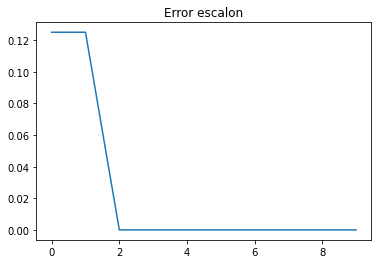

In [ ]:
# Plot de AND
plot_graph(and_result)

In [ ]:
# Array con las salidas esperadas de XOR
Yxor = np.array([0,1,1,0], dtype=float)
print(Yxor)

[0. 1. 1. 0.]


In [ ]:
# XOR
xor_result = Perceptron(Yxor, Mand, 10)

Fin de entrenameinto con error: 0.375
Numero de epocas necesarias; 10


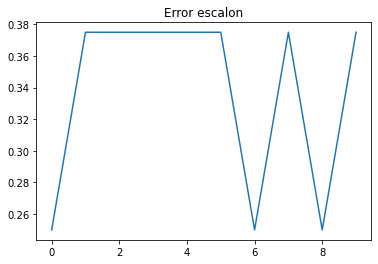

In [ ]:
# Plot de XOR
plot_graph(xor_result)

In [ ]:
# Array con las salidas esperadas de OR
Yor = np.array([0,1,1,1], dtype=float)
print(Yor)

[0. 1. 1. 1.]


In [ ]:
# OR
or_result = Perceptron(Yor, Mand, 10)

Fin de entrenameinto con error: 0.0
Numero de epocas necesarias; 3


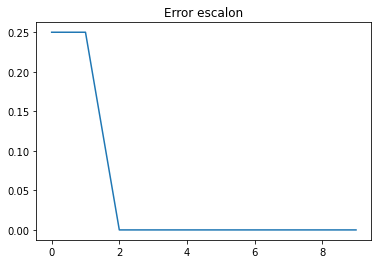

In [ ]:
# Plot de OR
plot_graph(or_result)

In [ ]:
# Función Sigmoide
def sigmoid(x):
  u = 1 / (1 + np.exp(-x))
  return u

Text(0.5, 1.0, 'Sigmoide')

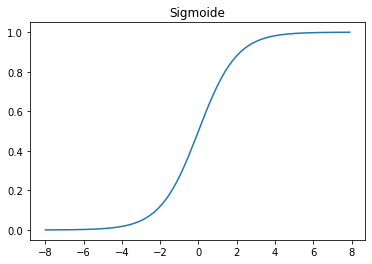

In [ ]:
# Plot de la función sigmoide
x = np.arange(-8,8,.1)
plt.figure()
plt.plot(x,[sigmoid(i) for i in x])
plt.title('Sigmoide')

In [ ]:
                                                                                  # Función de entrenamiento con sigmoide
def Perceptron_Sigmoid(traget, Mand, epocas):
  alpha = 0.1 
  W = np.random.rand(Mand.shape[1],1)
  epoca = 0                                                                         # Epoca actual
  Evector = np.zeros(epocas) 
  error_epoca = 1.0                                                               # 100% de error

  while error_epoca > 0 and epoca < epocas:
    j = 0
    errores = np.array([0,0,0,0], dtype=float)

    for patron in Mand:
      a = patron.dot(W)
                                                                                   # la salida se calcula ahora con la función sigmoid
      s = float(sigmoid(a))

      ap = (alpha*(traget[j]-s)*patron).T
      W += ap

      errores[j] = 0.5*(traget[j]-s)**2
      j += 1

    error_epoca = np.mean(errores)
    Evector[epoca] = error_epoca
    epoca += 1

  print('Fin de entrenameinto con error:', error_epoca)
  print('Numero de epocas necesarias;', epoca)
  return Evector

In [ ]:
# AND
and_sigmoid = Perceptron_Sigmoid(Yand, Mand, 200)

Fin de entrenameinto con error: 0.014205573999209893
Numero de epocas necesarias; 200


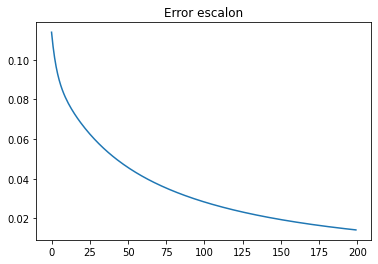

In [ ]:
# Plot de AND
plot_graph(and_sigmoid)

In [ ]:
# XOR
xor_sigmoid = Perceptron_Sigmoid(Yxor, Mand, 200)

Fin de entrenameinto con error: 0.1314867188524642
Numero de epocas necesarias; 200


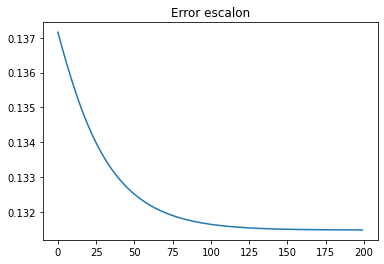

In [ ]:
# Plot de XOR
plot_graph(xor_sigmoid)

In [ ]:
# OR
or_sigmoid = Perceptron_Sigmoid(Yor, Mand, 200)

Fin de entrenameinto con error: 0.007309456560411168
Numero de epocas necesarias; 200


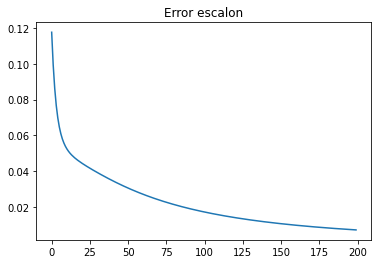

In [ ]:
# Plot de OR
plot_graph(or_sigmoid)

In [ ]:
def Perceptron_Predict(target, Mand, epocas):
  alpha = 0.1                                                                                     # 
  W = np.random.rand(Mand.shape[1],1)
  epoca = 0                                                                                       # Epoca actual
  error_epoca = 1.0                                                                               # 100% de error

  while error_epoca > 0 and epoca < epocas:
    j = 0
    errores = np.array([0,0,0,0], dtype=float)
    predict = []

    for patron in Mand:
      a = patron.dot(W)
      s = float(escalon(a))
                                                                                  # cuando el error sea 0, se obtendra una lista con la prediccion correcta
                                                                                   # o cuando se haya superado el limite de epocas
      predict.append(s)

      ap = (alpha*(target[j]-s)*patron).T
      W += ap

      errores[j] = 0.5*(target[j]-s)**2
      j += 1

    error_epoca = np.mean(errores)
    epoca += 1
  
  print('Prediction:',predict)

In [ ]:
                                                                                        # Predicción de las salidas con AND
Perceptron_Predict(Yand, Mand, 10)

Prediction: [0.0, 0.0, 0.0, 1.0]


In [ ]:
                                                                                    # Predicción de las salidas con XOR
Perceptron_Predict(Yxor, Mand, 200)

Prediction: [1.0, 0.0, 0.0, 1.0]


In [ ]:
                                                                                    # Predicción de las salidas con OR
Perceptron_Predict(Yor, Mand, 10)

Prediction: [0.0, 1.0, 1.0, 1.0]
